In [7]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import ascii, votable
from astropy.table import Table, vstack, hstack
import astropy.units as u

dir_rrlyrae = '/datascope/menard/group/scheng/Gaia/'

In [8]:
isochrone_sun = Table.read('/home/scheng/Gaia/5Gyr_0.0152.dat',format='ascii')
isochrone_old = Table.read('/home/scheng/Gaia/10Gyr_0.0152.dat',format='ascii')
isochrone_mpoor = Table.read('/home/scheng/Gaia/10Gyr_0.000152.dat',format='ascii')
isochrone_old

<Table length=289>
  Zini       Age          Mini       Mass  ... mbolmag   Gmag  G_BPmag G_RPmag
float64    float64      float64    float64 ... float64 float64 float64 float64
------- ------------- ------------ ------- ... ------- ------- ------- -------
 0.0152 10000000000.0 0.0900000036    0.09 ...  13.327  15.495  18.812  14.112
 0.0152 10000000000.0 0.1000000015     0.1 ...  12.871  14.758  17.793  13.398
 0.0152 10000000000.0 0.1077039689   0.108 ...  12.601  14.346  17.188  13.003
 0.0152 10000000000.0 0.1200000122    0.12 ...  12.209  13.759  16.281  12.449
 0.0152 10000000000.0 0.1400000006    0.14 ...  11.749   13.11  15.333   11.84
 0.0152 10000000000.0 0.1496137679    0.15 ...  11.573  12.877    15.0  11.622
 0.0152 10000000000.0 0.1599999964    0.16 ...  11.395  12.643  14.665  11.403
 0.0152 10000000000.0  0.200000003     0.2 ...  10.846  11.953  13.725  10.759
 0.0152 10000000000.0         0.25    0.25 ...  10.314  11.305  12.894  10.151
 0.0152 10000000000.0 0.3000000119     0.3 ...     9.9  10.819  12.304   9.692
    ...           ...          ...     ... ...     ...     ...     ...     ...
 0.0152 10000000000.0 1.0395127535   0.652 ...  -2.872  -2.241  -1.265  -3.181
 0.0152 10000000000.0 1.0395128727   0.644 ...  -2.939  -2.307  -1.327  -3.247
 0.0152 10000000000.0 1.0395131111   0.635 ...   -3.24  -2.461  -1.339  -3.461
 0.0152 10000000000.0 1.0395133495   0.623 ...  -3.609  -2.597  -1.207  -3.685
 0.0152 10000000000.0  1.039513588    0.61 ...  -3.909  -2.703   -1.05  -3.857
 0.0152 10000000000.0 1.0395138264   0.595 ...  -4.099   -2.83  -1.078  -4.003
 0.0152 10000000000.0  1.039514184   0.579 ...  -4.195  -3.007  -1.354   -4.16
 0.0152 10000000000.0 1.0395145416   0.561 ...  -4.237  -3.195  -1.728  -4.303
 0.0152 10000000000.0 1.0395148993   0.542 ...  -4.259  -3.383  -2.118  -4.433
 0.0152 10000000000.0 1.0395157337   0.542 ...  29.767  30.327  30.271  30.383

## load npy file

In [9]:
with_rv_all = np.load(dir_rrlyrae+'/with_rv_all.npy')[0]['with_rv_all']
len(with_rv_all)

5464644

In [484]:
rrlyrae = np.load(dir_rrlyrae+'/rrlyrae.npy')[0]['rrlyrae']
len(rrlyrae)

140784

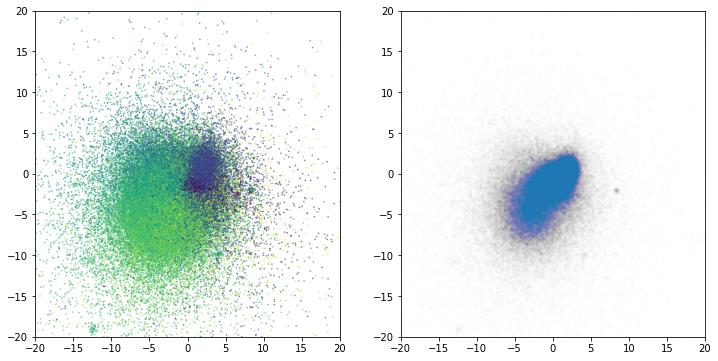

In [644]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.scatter(rrlyrae['pmra'],rrlyrae['pmdec'],s=0.5,c=rrlyrae['ra'],alpha=0.5)
plt.xlim(-20,20)
plt.ylim(-20,20)

plt.subplot(1,2,2)
plt.plot(rrlyrae['pmra'],rrlyrae['pmdec'],'.',alpha=0.005)
plt.xlim(-20,20)
plt.ylim(-20,20)
plt.show()

In [ ]:
galactic

## define variables

In [629]:
table = with_rv_all.copy()
bp_rp = np.array(table['bp_rp'])
g = np.array(table['phot_g_mean_mag'])
l = table['l']
b = table['b']
ra = table['ra']
dec = table['dec']

d = 1 / np.array(table['parallax'])*u.kpc
e_d = d * np.array(table['parallax_error']/table['parallax'])
X = - d * np.array(np.cos(b/180*np.pi) * np.cos(l/180*np.pi))
Y = d * np.array(np.cos(b/180*np.pi) * np.sin(l/180*np.pi))
Z = d * np.array(np.sin(b/180*np.pi))
pmra = np.array(table['pmra'])*1*u.mas/u.yr
pmdec = np.array(table['pmdec'])*1*u.mas/u.yr
pm_abs = np.sqrt(pmra**2 + pmdec**2)
rv = np.array(table['radial_velocity'])*u.km/u.s

from astropy.coordinates import ICRS, Galactic
galactic = ICRS(ra=ra, dec=dec,distance=d,\
      pm_ra_cosdec=pmra, pm_dec=pmdec,radial_velocity=rv).transform_to(Galactic)

U = galactic.velocity.d_x
V = galactic.velocity.d_y
W = galactic.velocity.d_z

## import dustmap

In [251]:
from astropy.coordinates import SkyCoord
from dustmaps.planck import PlanckQuery
from dustmaps.sfd import SFDQuery
from dustmaps.bayestar import BayestarQuery

from dustmaps.config import config
config['data_dir'] = '/datascope/menard/group/scheng/dust/dustmaps'

coords = SkyCoord(l, b, distance=(10**((g-0.7+5)/5))*u.pc, frame='galactic')

#planck = PlanckQuery()
#planck(coords)

sfd = SFDQuery()
sfd_ext = sfd(coords)

#bayestar = BayestarQuery() # Bayestar2017 is the default
#bayestar_ext = bayestar(coords, mode='median')

/home/scheng/miniconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:4033: RuntimeWarning: Invalid value encountered in median for 1863287 results
  r = func(a, **kwargs)



# vphi distribution for the disk

/home/scheng/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.


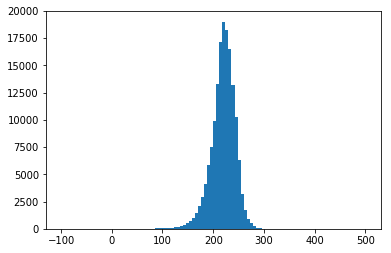

In [11]:
selected = (d > 0) * (np.abs(bp_rp-0.75)<10.25) * (np.abs(Z.value+0.03)<0.01) * (np.abs(X.value-5)<122.5) \
                    *(rv.value>-100000) * (pm_abs.value>-100000000)



data_x = X[selected]
data_y = Y[selected]

theta = np.arctan2(Y.value,X.value+8.2)
vr = ((U.value+13)*np.cos(theta)-(V.value+240)*np.sin(theta))[selected]
vphi = ((V.value+240)*np.cos(theta)+(U.value+13)*np.sin(theta))[selected]


plt.hist(vphi, bins=100,range=(-100,500))
plt.show()

/home/scheng/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in less
  # This is added back by InteractiveShellApp.init_path()
/home/scheng/miniconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/scheng/miniconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/scheng/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:39: RuntimeWarning: divide by zero encountered in log10


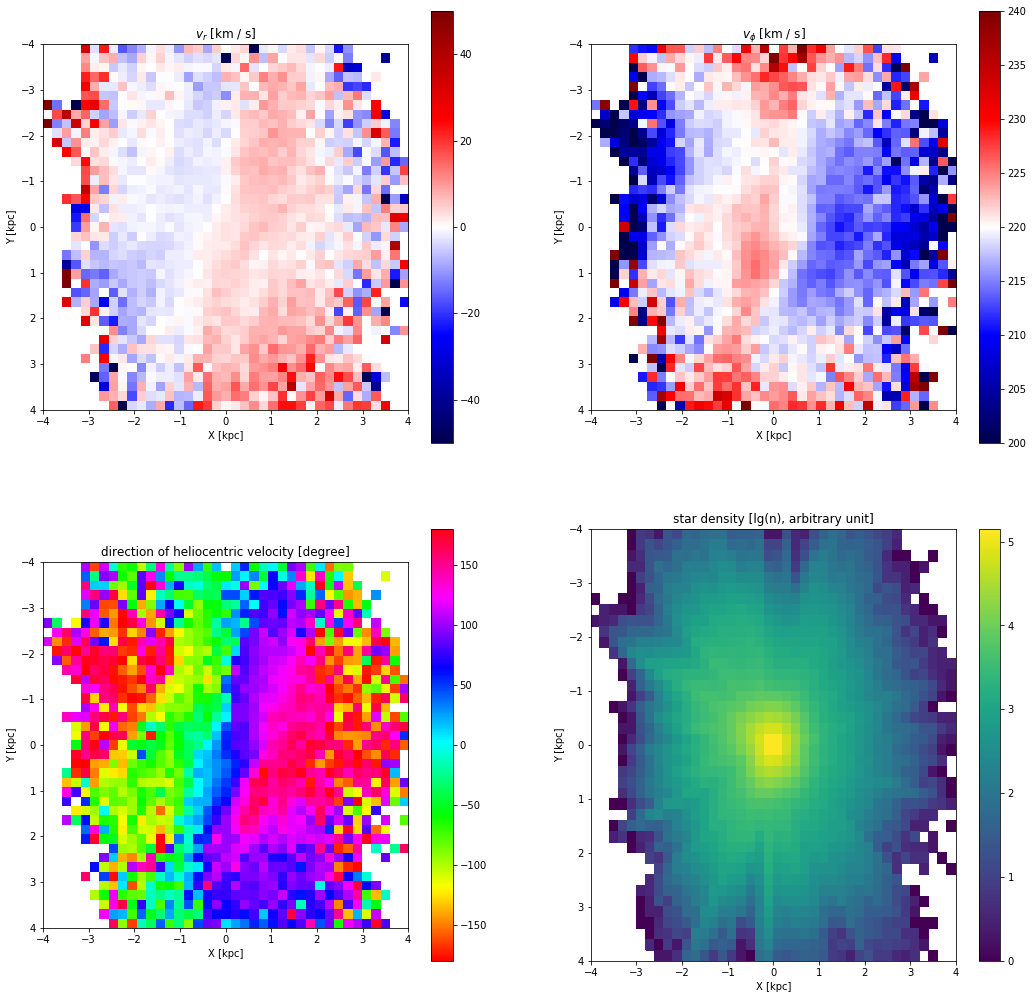

In [12]:
def plot_median(data_x, data_y, data_z, x1 = -4, x2 = 4, y1 = -4, y2 = 4, n = 40):    
    X_range = np.linspace(x1,x2,n)*u.kpc
    Y_range = np.linspace(y1,y2,n)*u.kpc
    average_array = np.empty((len(X_range)-1,len(Y_range)-1))
    for i,x_coor in enumerate(X_range[:-1]):
        for j,y_coor in enumerate(Y_range[:-1]):
            average_array[i,j] = (np.median(data_z[(data_x>X_range[i])*(data_x<X_range[i+1])*\
                                               (data_y>Y_range[j])*(data_y<Y_range[j+1])]))       
    return average_array


selected = (d > 0) * (np.abs(bp_rp-0.75)<10.25) * (np.abs(Z.value+0.03)<0.2) * (np.abs(X.value-5)<122.5) \
                    *(rv.value>-100000) * (pm_abs.value>-100000000)



data_x = X[selected]
data_y = Y[selected]

theta = np.arctan2(Y.value,X.value+8.2)
vr = ((U.value+13)*np.cos(theta)-(V.value+240)*np.sin(theta))[selected]
vphi = ((V.value+240)*np.cos(theta)+(U.value+13)*np.sin(theta))[selected]


x1 = -4; x2 = 4; y1 = 4; y2 = -4; n = 40
plt.figure(figsize=(18,27)) 

plt.subplot(3,2,3)
plt.title('direction of heliocentric velocity [degree]')
vdirection_field = 180/np.pi*np.arctan2(plot_median(data_x, data_y, vr).T , plot_median(data_x, data_y, vphi-220).T )
plt.imshow(vdirection_field,\
           extent=[x1,x2,y1,y2],cmap='hsv')
plt.xlabel('X [kpc]')
plt.ylabel('Y [kpc]')
plt.colorbar()

plt.subplot(3,2,4)
plt.title('star density [lg(n), arbitrary unit]')
H, xedges, yedges = np.histogram2d(X[selected], Y[selected], bins=(n, n),range=((x1,x2),(min(y1,y2),max(y1,y2))))
H = H.T
X_display, Y_display = np.meshgrid(xedges, yedges)
plt.pcolormesh(X_display, Y_display, np.log10(H))
plt.xlabel('X [kpc]')
plt.ylabel('Y [kpc]')
plt.xlim(x1,x2)
plt.ylim(y1,y2)
plt.colorbar()

plt.subplot(3,2,1)
plt.title('$v_r$ [km / s]')
vr_field = plot_median(data_x, data_y, vr).T
plt.imshow(vr_field,\
           extent=[x1,x2,y1,y2],vmin=-50,vmax=50,cmap='seismic')
plt.xlabel('X [kpc]')
plt.ylabel('Y [kpc]')
plt.colorbar()

plt.subplot(3,2,2)
plt.title('$v_\phi$ [km / s]')
vphi_field = plot_median(data_x, data_y, vphi).T
plt.imshow(vphi_field,\
           extent=[x1,x2,y1,y2],vmin=200,vmax=240,cmap='seismic')
plt.xlabel('X [kpc]')
plt.ylabel('Y [kpc]')
plt.colorbar()


plt.show()

In [949]:
selected = (d > 0) * (np.abs(bp_rp-0.75)<10.25) * (np.abs(Z.value+0.03)<0.2) * (np.abs(X.value-5)<122.5) \
                    *(rv.value>-100000) * (pm_abs.value>-100000000)
selected.sum()

/home/scheng/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.


2822722

/home/scheng/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in less
  # This is added back by InteractiveShellApp.init_path()
/home/scheng/miniconda3/lib/python3.6/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/scheng/miniconda3/lib/python3.6/site-packages/numpy/core/_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/scheng/miniconda3/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/scheng/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:39: RuntimeWarning: divide by zero encountered in log10


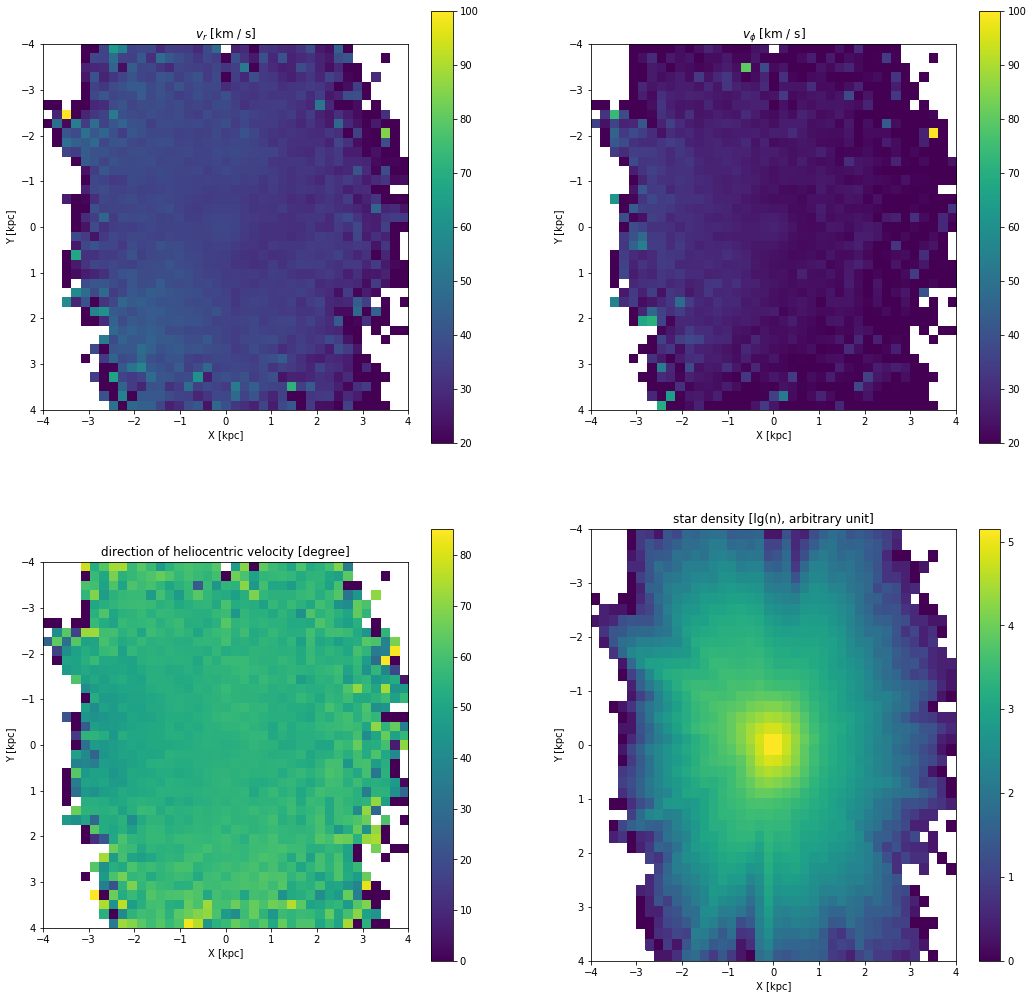

In [938]:
def plot_std(data_x, data_y, data_z, x1 = -4, x2 = 4, y1 = -4, y2 = 4, n = 40):    
    X_range = np.linspace(x1,x2,n)*u.kpc
    Y_range = np.linspace(y1,y2,n)*u.kpc
    average_array = np.empty((len(X_range)-1,len(Y_range)-1))
    for i,x_coor in enumerate(X_range[:-1]):
        for j,y_coor in enumerate(Y_range[:-1]):
            average_array[i,j] = (np.std(data_z[(data_x>X_range[i])*(data_x<X_range[i+1])*\
                                               (data_y>Y_range[j])*(data_y<Y_range[j+1])]))       
    return average_array


selected = (d > 0) * (np.abs(bp_rp-0.75)<10.25) * (np.abs(Z.value+0.03)<0.2) * (np.abs(X.value-5)<122.5) \
                    *(rv.value>-100000) * (pm_abs.value>-100000000)



data_x = X[selected]
data_y = Y[selected]

theta = np.arctan2(Y.value,X.value+8.2)
vr = ((U.value+13)*np.cos(theta)-(V.value+240)*np.sin(theta))[selected]
vphi = ((V.value+240)*np.cos(theta)+(U.value+13)*np.sin(theta))[selected]


x1 = -4; x2 = 4; y1 = 4; y2 = -4; n = 40
plt.figure(figsize=(18,27)) 

plt.subplot(3,2,3)
plt.title('direction of heliocentric velocity [degree]')
vdirection_field_std = 180/np.pi*np.arctan2(plot_std(data_x, data_y, vr).T , plot_std(data_x, data_y, vphi-225).T )
plt.imshow(vdirection_field_std,\
           extent=[x1,x2,y1,y2])
plt.xlabel('X [kpc]')
plt.ylabel('Y [kpc]')
plt.colorbar()

plt.subplot(3,2,4)
plt.title('star density [lg(n), arbitrary unit]')
H, xedges, yedges = np.histogram2d(X[selected], Y[selected], bins=(n, n),range=((x1,x2),(min(y1,y2),max(y1,y2))))
H = H.T
X_display, Y_display = np.meshgrid(xedges, yedges)
plt.pcolormesh(X_display, Y_display, np.log10(H))
plt.xlabel('X [kpc]')
plt.ylabel('Y [kpc]')
plt.xlim(x1,x2)
plt.ylim(y1,y2)
plt.colorbar()

plt.subplot(3,2,1)
plt.title('$v_r$ [km / s]')
vr_field_std = plot_std(data_x, data_y, vr).T
plt.imshow(vr_field_std,\
           extent=[x1,x2,y1,y2],vmin=20,vmax=100)
plt.xlabel('X [kpc]')
plt.ylabel('Y [kpc]')
plt.colorbar()

plt.subplot(3,2,2)
plt.title('$v_\phi$ [km / s]')
vphi_field_std = plot_std(data_x, data_y, vphi).T
plt.imshow(vphi_field_std,\
           extent=[x1,x2,y1,y2],vmin=20,vmax=100)
plt.xlabel('X [kpc]')
plt.ylabel('Y [kpc]')
plt.colorbar()


plt.show()

/home/scheng/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log10
  from ipykernel import kernelapp as app


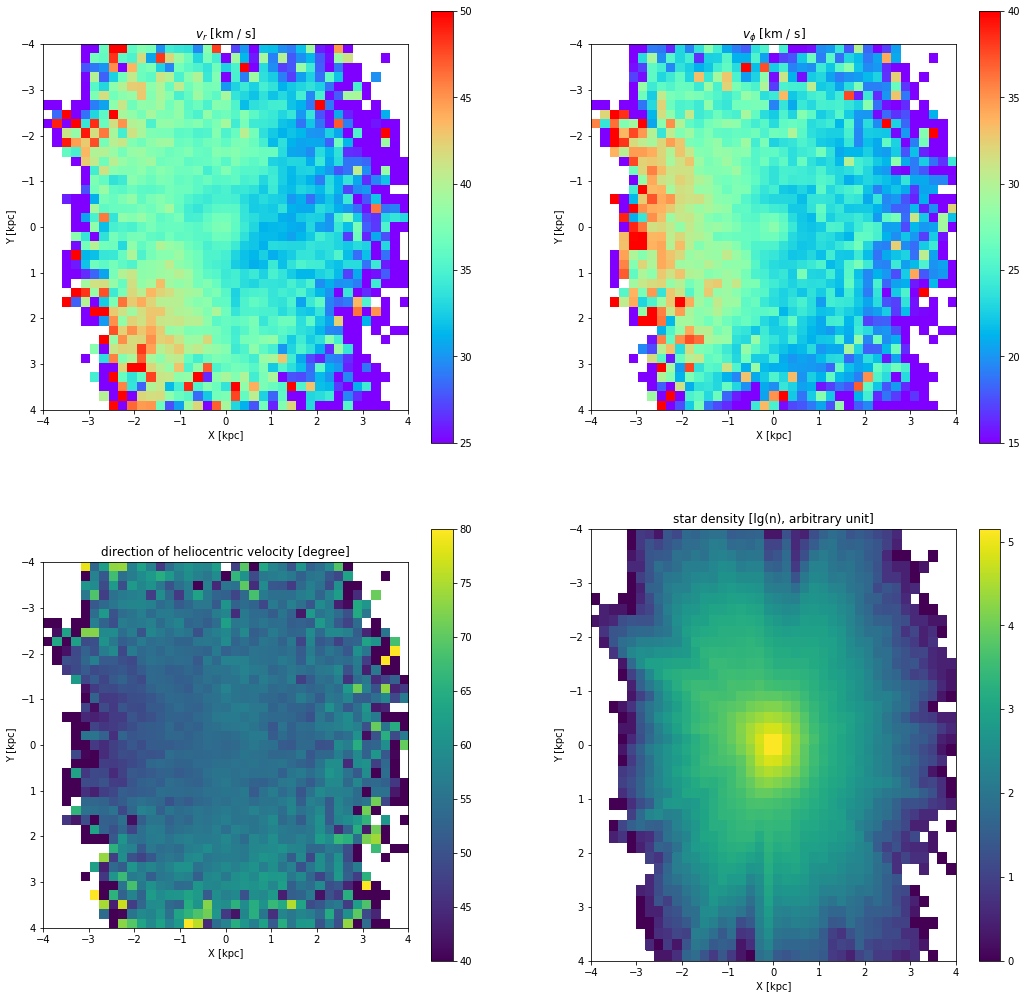

In [947]:
plt.figure(figsize=(18,27)) 

plt.subplot(3,2,3)
plt.title('direction of heliocentric velocity [degree]')
plt.imshow(vdirection_field_std,\
           extent=[x1,x2,y1,y2],vmin=40,vmax=80)
plt.xlabel('X [kpc]')
plt.ylabel('Y [kpc]')
plt.colorbar()

plt.subplot(3,2,4)
plt.title('star density [lg(n), arbitrary unit]')
H, xedges, yedges = np.histogram2d(X[selected], Y[selected], bins=(n, n),range=((x1,x2),(min(y1,y2),max(y1,y2))))
H = H.T
X_display, Y_display = np.meshgrid(xedges, yedges)
plt.pcolormesh(X_display, Y_display, np.log10(H))
plt.xlabel('X [kpc]')
plt.ylabel('Y [kpc]')
plt.xlim(x1,x2)
plt.ylim(y1,y2)
plt.colorbar()

plt.subplot(3,2,1)
plt.title('$v_r$ [km / s]')
plt.imshow(vr_field_std,\
           extent=[x1,x2,y1,y2],vmin=25,vmax=50,cmap='rainbow')
plt.xlabel('X [kpc]')
plt.ylabel('Y [kpc]')
plt.colorbar()

plt.subplot(3,2,2)
plt.title('$v_\phi$ [km / s]')
plt.imshow(vphi_field_std,\
           extent=[x1,x2,y1,y2],vmin=15,vmax=40,cmap='rainbow')
plt.xlabel('X [kpc]')
plt.ylabel('Y [kpc]')
plt.colorbar()


plt.show()

/home/scheng/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in less
  """
/home/scheng/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log10
  del sys.path[0]
/home/scheng/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log10
  from ipykernel import kernelapp as app


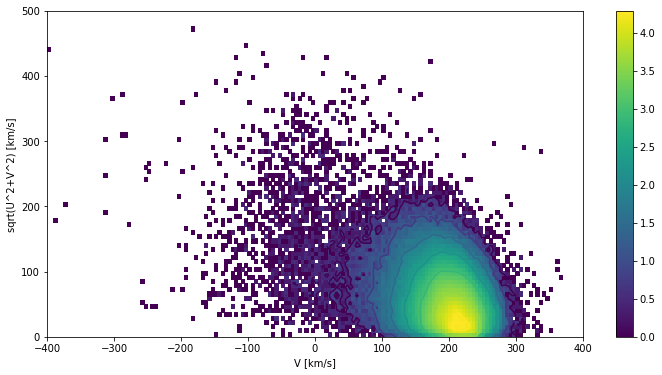

In [13]:
U = galactic.velocity.d_x
V = galactic.velocity.d_y
W = galactic.velocity.d_z

selected = (d > 0) * (e_d/d < 0.1) * (np.abs(bp_rp-0.75)<10.25) * (np.abs(Z.value-0)<0.1)\
                            *(rv.value>-100000) * (pm_abs.value>-100000000)


H, xedges, yedges = np.histogram2d(V[selected].value+230, np.sqrt(U[selected]**2+W[selected]**2), bins=(160, 80),range=((-400,400),(0,500)))
H = H.T
X_display, Y_display = np.meshgrid(xedges, yedges)

plt.figure(figsize=(12,6))
plt.pcolormesh(X_display, Y_display, np.log10(H))
plt.colorbar()
plt.contour(np.log10(H),extent=(-400,400,0,500))
plt.xlabel('V [km/s]')
plt.ylabel('sqrt(U^2+V^2) [km/s]')
plt.show()

In [366]:
vphi

array([231.67648015, 184.34569105, 216.44618249, ..., 236.30398242,
       -16.01692992, 202.44254543])

/home/scheng/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in less
  This is separate from the ipykernel package so we can avoid doing imports until

/home/scheng/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log10
  # Remove the CWD from sys.path while we load stuff.



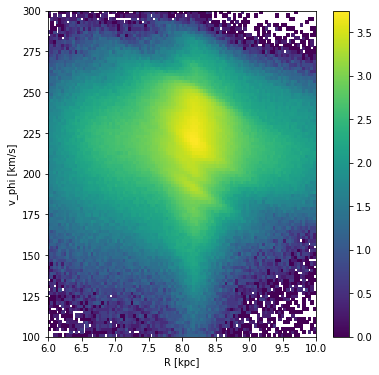

In [374]:
plt.figure(figsize=(6,6))
#plt.title('star density [lg(n), arbitrary unit]')
selected = (d > 0) * (np.abs(bp_rp-0.75)<10.25) * (np.abs(Z.value+0.03)<0.2) * (np.abs(X.value-5)<122.5) \
                    *(rv.value>-100000) * (pm_abs.value>-100000000)

x = R
y = vphi
H, xedges, yedges = np.histogram2d(x[selected], y[selected], bins=(100, 100),range=((6,10),(100,300)))
H = H.T
X_display, Y_display = np.meshgrid(xedges, yedges)
plt.pcolormesh(X_display, Y_display, np.log10(H))
plt.xlabel('R [kpc]')
plt.ylabel('v_phi [km/s]')
#plt.xlim(x1,x2)
#plt.ylim(y1,y2)
plt.colorbar()
plt.show()

## Action Space

In [43]:
theta = np.arctan2(Y.value,X.value+8.2)
vR = ((U.value+13)*np.cos(theta)-(V.value+240)*np.sin(theta))
vphi = ((V.value+240)*np.cos(theta)+(U.value+13)*np.sin(theta))
R = (Y.value**2 + (X.value+8.2)**2)**0.5

In [133]:
from galpy.potential import MWPotential2014
from galpy.actionAngle import actionAngleStaeckelGrid, actionAngleStaeckel
#aASG= actionAngleStaeckelGrid(pot=MWPotential2014,delta=0.4,nE=51,npsi=51,nLz=61,c=True)
aAS= actionAngleStaeckel(pot=MWPotential2014,delta=0.4,c=True)

ImportError: cannot import name 'actionAngleStaeckel'

In [82]:
np.save('aASG.npy',np.array([{'aASG':aASG}]))

In [83]:
aASG = np.load('aASG.npy')[0]['aASG']

In [267]:
action = []
for i in range(1):
    print(i)
    selected = np.where((d > 0) * (d.value<10) * (np.abs(bp_rp-0.75)<10.25) * (np.abs(Z.value+0.03)<0.2) * (np.abs(X.value-5)<122.5) \
                    *((U.value**2+(V.value**240)+W.value**2)<340**2) * (pm_abs.value>0.05) )[0][index]#[np.random.randint(0,2822233,500000)]


    Jr, Lz, Jz = aASG(R[selected]/8,vR[selected]/220,vphi[selected]/220,\
                 (Z[selected].value+0.03)/8,W[selected].value/220)
    action.append( {'Jr':Jr, 'Lz':Lz, 'Jz':Jz, 'R':R[selected]/8, 'Z':Z[selected].value/8, 'theta':theta[selected] } )

0
/home/scheng/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in less
  after removing the cwd from sys.path.



In [298]:
selected = np.where((d > 0) * (d.value<10) * (np.abs(bp_rp-0.75)<10.25) * (np.abs(Z.value+0.03)<0.2) * (np.abs(X.value-5)<122.5) \
                    *((U.value**2+(V.value+220)**2+W.value**2)<340**2) * (pm_abs.value>0.05) )[0]

/home/scheng/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.



In [342]:
action = []
for i in range(30):
    print(i)
    selected = np.where((d > 0) * (d.value<10) * (np.abs(bp_rp-0.75)<10.25) * (np.abs(Z.value+0.03)<0.2) * (np.abs(X.value-5)<122.5) \
                    *((U.value**2+(V.value+240)**2+W.value**2)<340**2) * (pm_abs.value>0.05) )[0][i*100000:i*100000+100000]#[np.random.randint(0,2822233,500000)]


    Jr, Lz, Jz = aASG(R[selected]/8,vR[selected]/220,vphi[selected]/220,\
                 (Z[selected].value+0.03)/8,W[selected].value/220)
    action.append( {'Jr':Jr, 'Lz':Lz, 'Jz':Jz, 'R':R[selected]/8, 'Z':Z[selected].value/8, 'theta':theta[selected]  } )

0
/home/scheng/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in less
  after removing the cwd from sys.path.

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


In [296]:
print(X[index], Y[index], Z[index])
U[index], V[index],W[index],(((U.value**2+(V.value+220)**2+W.value**2)[index])<340**2)

0.3483059694490369 kpc 2.285419484518532 kpc 0.8561919535202647 kpc


(<Quantity 88.30845746 km / s>,
 <Quantity -10.14496563 km / s>,
 <Quantity -12.97089835 km / s>,
 True)

In [343]:
action_all = action.copy()

/home/scheng/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in log10



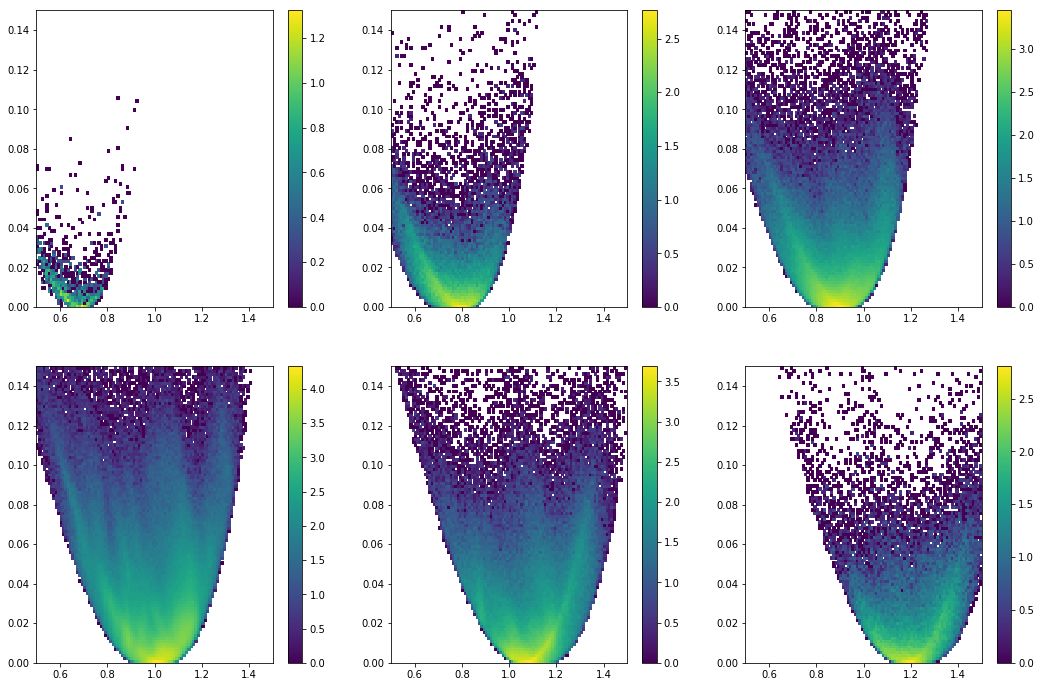

In [398]:
plt.figure(figsize=(18,12))
H_final = []
action = action_all
# r to sun cut
#for j,R_bin in enumerate([0,0.5,1,1.5,2,2.5]):
# R to GC cut   
for j,R_bin in enumerate([5,6,7,8,9,10]):
# phi cut   
#for j,phi_bin in enumerate([-0.1,-0.05,0,0.05,0.1]):

    
    plt.subplot(2,3,j+1)
    x = action[0]['Lz']
    y = action[0]['Jr']
    H_temp, xedges, yedges = np.histogram2d(x,y, bins=(100, 100),range=((0.5,1.5),(0,0.15)))
    H = H_temp.T-H_temp.T
    
    for i in range(30):
        # r to sun cut
        selected = (action[i]['Jz']<0.005) * \
        (np.abs((action[i]['Z']**2+(action[i]['R']-1.025)**2+action[i]['theta']**2*action[i]['R']**2)**0.5-R_bin/8)<0.2/8)
        # R to GC cut
        selected = (action[i]['Jz']<0.005) * \
        (np.abs(action[i]['R']-R_bin/8)<0.5/8)
        # phi  cut
        #selected = (action[i]['Jz']<0.0025) * \
        #(np.abs(action[i]['theta']-phi_bin)<0.025)


        
        x = action[i]['Lz'][selected]
        y = action[i]['Jr'][selected]
        
        H_temp, xedges, yedges = np.histogram2d(x,y, bins=(100, 100),range=((0.5,1.5),(0,0.15)))
        H = H + H_temp.T
        X_display, Y_display = np.meshgrid(xedges, yedges)
    
    plt.pcolormesh(X_display, Y_display, np.log10(H))
    #plt.xlabel('Lz')
    #plt.ylabel('Jz')
    plt.colorbar()
    H_final.append(H)
    
    #r_co = 5.3/8
    #plt.axvline(r_co)
    #plt.axvline(r_co*(1+2**0.5/6),alpha=0.5)
    #plt.axvline(r_co*(1+2**0.5/4))
    #plt.axvline(r_co*(1+2**0.5/2))

#plt.subplot(1,2,2)
#plt.pcolormesh(X_display, Y_display, np.log10(H))
#plt.xlabel('Lz')
#plt.ylabel('Jz')
#plt.colorbar()
    
plt.show()

/home/scheng/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  

/home/scheng/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in subtract
  



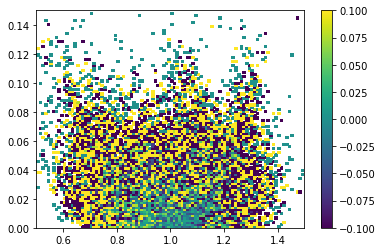

In [259]:
x = action[i]['Lz']
y = action[i]['Jr']

X_display, Y_display = np.meshgrid(xedges, yedges)

plt.pcolormesh(X_display, Y_display, np.log10(H_final[0])-np.log10(H_final[1]),vmin=-0.1,vmax=0.1)
#plt.xlabel('Lz')
#plt.ylabel('Jz')
plt.colorbar()
plt.show()


In [ ]:
selected = np.where((d > 0) * (np.abs(bp_rp-0.75)<10.25) * (np.abs(Z.value+0.03)<0.2) * (np.abs(X.value-5)<122.5) \
                    *(rv.value>-100000) * (pm_abs.value>0.05) )[0][0:1000000]

dv = np.random.rand()
Jr, Lz, Jz = aASG(1,0.1,1,1,0.1)

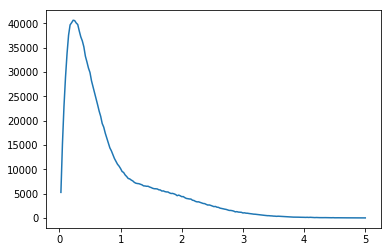

In [590]:
from scipy.interpolate import interp1d
density, bin_edge = np.histogram(np.sqrt(X.value**2+Y.value**2)[selected],bins=200,range=(0,5))
plt.plot(bin_edge[1:],density)
density_radius_relation = interp1d((bin_edge[1:]+bin_edge[:-1])/2, density,fill_value='extrapolate')
plt.show()

## W [km/s] distribution

/home/scheng/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.

/home/scheng/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log10
  

/home/scheng/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in less



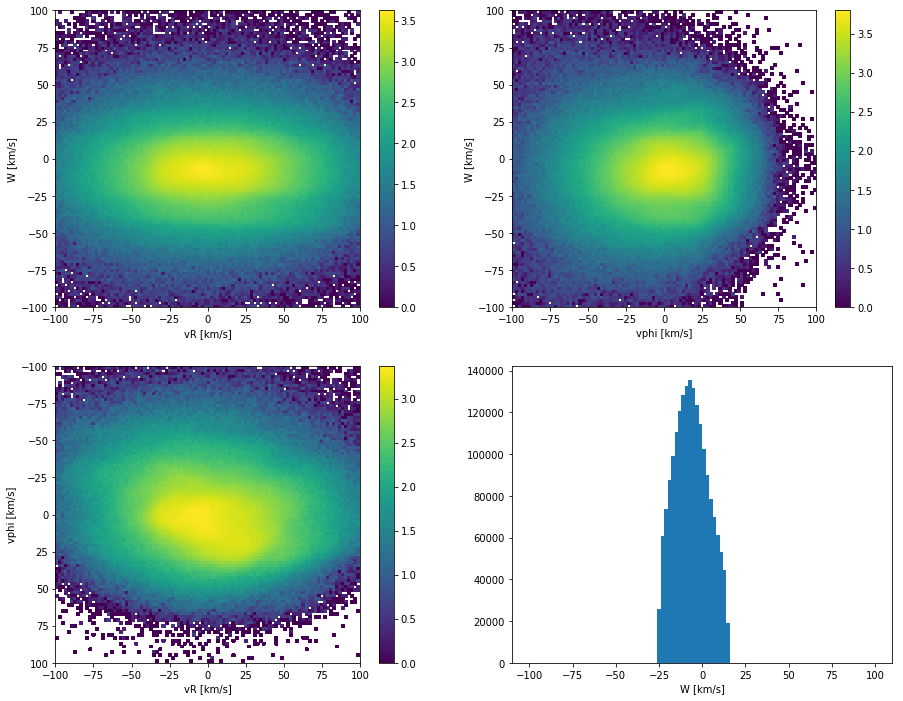

In [253]:
selected = (d.value<5)*(d > 0) * (e_d/d < 0.1) * (np.abs(bp_rp-0.75)<1) * (np.abs(Z.value-0)<0.2)\
                            *(rv.value>-100000) * (pm_abs.value>-100000000)
    
def plot_UVW(x,y,xlabel,ylabel):  
    H, xedges, yedges = np.histogram2d(x,y, bins=(100, 100),range=((-100,100),(-100,100)))
    H = H.T
    X_display, Y_display = np.meshgrid(xedges, yedges)
    
    plt.pcolormesh(X_display, Y_display, np.log10(H))
    #plt.colorbar()
    #plt.contour(H, extent=(-100,100,-100,100))
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.ylim(-100,100)
    plt.colorbar()
    #plt.imshow(H)

plt.figure(figsize=(15,12))
plt.subplot(2,2,1)  
plot_UVW(vR[selected], W[selected],'vR [km/s]', 'W [km/s]')

plt.subplot(2,2,2)
plot_UVW(vphi[selected]-220, W[selected],'vphi [km/s]', 'W [km/s]')

selected = selected = (d.value<5)*(d > 0) * (e_d/d < 0.1) * (np.abs(bp_rp-0.75)<1) * (np.abs(Z.value-0)<0.2)\
                            *(rv.value>-100000) * (pm_abs.value>-100000000)*\
                            (np.abs(galactic.velocity.d_z.value+5)<20)
plt.subplot(2,2,3)
plot_UVW(vR[selected], vphi[selected]-220,'vR [km/s]', 'vphi [km/s]')
plt.ylim(100,-100)

plt.subplot(2,2,4)
plt.hist(galactic.velocity.d_z[selected].value,bins=100,range=(-100,100))
plt.xlabel('W [km/s]')
plt.show()

# All properties in CMD

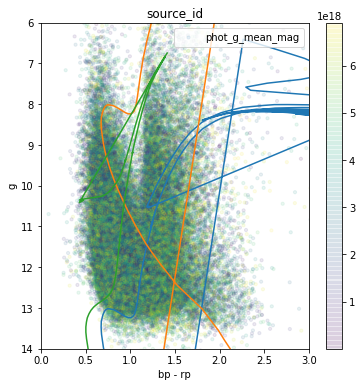

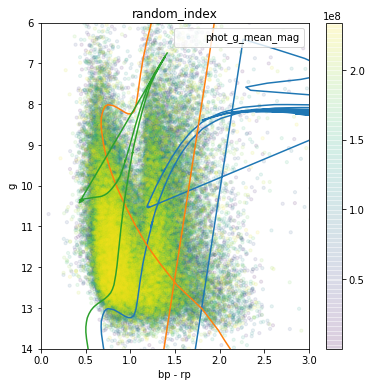

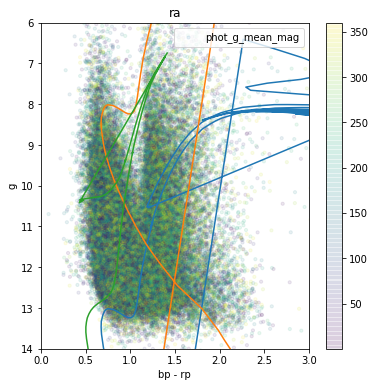

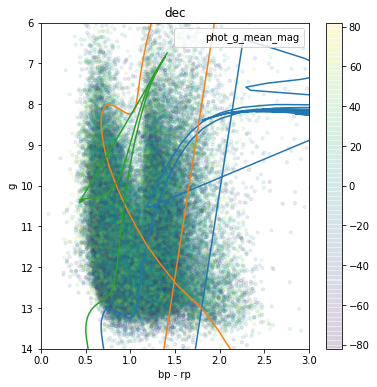

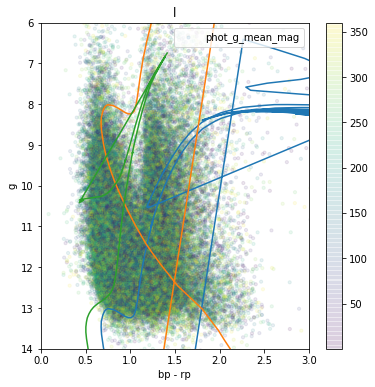

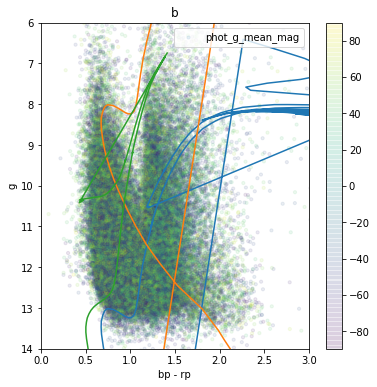

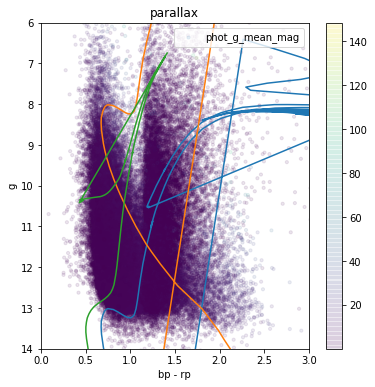

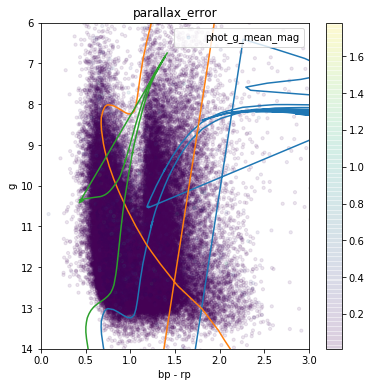

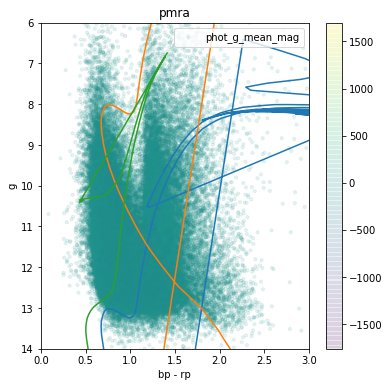

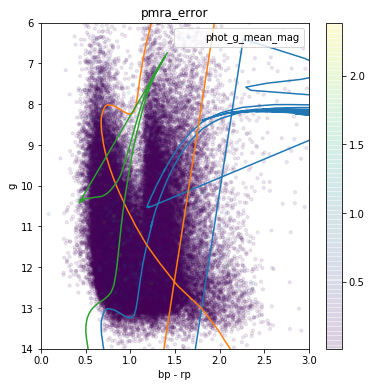

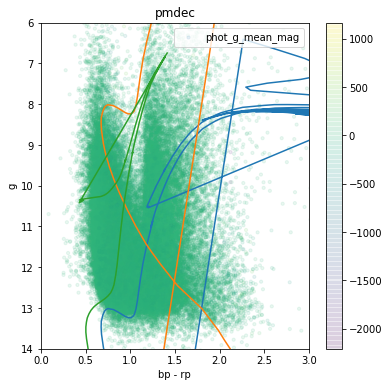

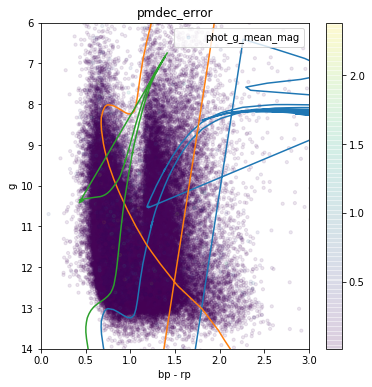

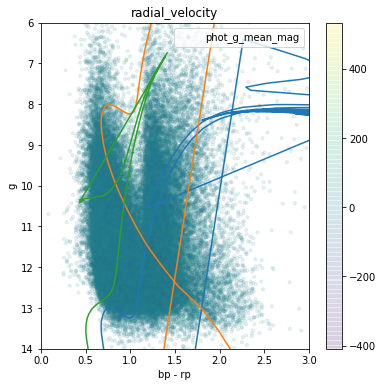

In [104]:
table = sample
for i,key in enumerate(table.keys()):
    if table[key].dtype == float or table[key].dtype == int:
        plt.figure(figsize=(6,6))
        selected = np.where((np.abs(table['b'])>35) \
                          )[0]
        #selected = np.where((np.abs(table.array['b'])>25) * (np.abs(table.array['bp_rp']-0.5)<0.2) \
        #                   * (np.abs(table.array['phot_g_mean_mag']-19.2)<1.5) \
        #                   * (np.abs(table.array['l']+80-360)<10) * (np.abs(table.array['b']+35)<10))[0]
        
        x = bp_rp
        y = g - table['a_g_val']
        z = table[key]
        plt.scatter(x[selected],y[selected],10,z[selected],alpha=0.1)#,label='RRc type')
        
        plt.legend()
        plt.colorbar()
        
        plt.title(key)
        plt.ylim(14,6)
        plt.xlim(-0.,3)
        plt.xlabel('bp - rp')
        plt.ylabel('g')
        
        plt.plot((isochrone_sun['G_BPmag']-isochrone_sun['G_RPmag']), isochrone_sun['Gmag']+10,'-')
        plt.plot((isochrone_sun['G_BPmag']-isochrone_sun['G_RPmag']), isochrone_sun['Gmag']+5,'-')
        plt.plot((isochrone_mpoor['G_BP']-isochrone_mpoor['G_RP']), isochrone_mpoor['G']+10,'-')
        
        
        plt.show()

/home/scheng/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less
  



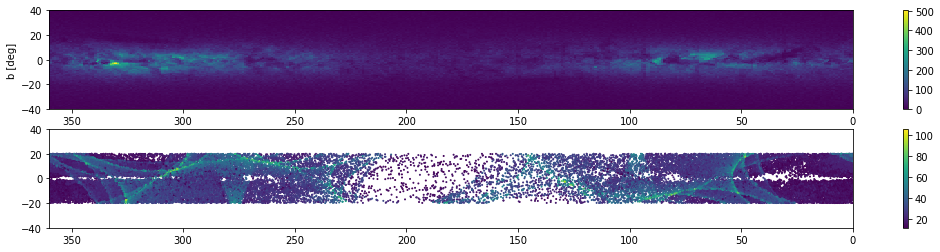

In [618]:
selected = (\
        (d > 0) * (d.value<10) * (np.abs(bp_rp-0.75)<10.25) * (np.abs(Z.value+0.03+(i-3)*0.2)<0.2*) * (np.abs(X.value-5)<122.5)* \
        ((U.value**2+(V.value+240)**2+(W.value+8)**2)<340**2)  * (pm_abs.value>0.05) * (np.abs(W.value+8)<20) *\
        (np.abs(1.77*(bp_rp-1)-Mg)<0.5) )



H, xedges, yedges = np.histogram2d(l[selected], b[selected], bins=(360, 80),range=((0,360),(-40,40)))
H_lb_density = H.T
X_lb_display, Y_lb_display = np.meshgrid(xedges, yedges)

plt.figure(figsize=(18,4))
plt.subplot(2,1,1)
plt.pcolormesh(X_lb_display, Y_lb_display, H_lb_density)
plt.xlabel('l [deg]')
plt.ylabel('b [deg]')
plt.xlim(360,0)
plt.colorbar()

plt.subplot(2,1,2)
selected = np.abs(rrlyrae['b'])<40
plt.scatter(rrlyrae['l'][selected],rrlyrae['b'][selected],c=rrlyrae['num_clean_epochs_g'][selected],s=1)
plt.xlim(360,0)
plt.ylim(-40,40)
plt.colorbar()
plt.show()

In [613]:
b_display.min()

-27.93835272960233

In [616]:
i=1
Z_display = -(0.03+(i-3)*0.02)

l_display = 180/np.pi*np.arctan2(-(Y_display[:-1,:-1]+Y_display[1:,1:])/2 , (X_display[:-1,:-1]-8+X_display[1:,1:]-8)/2)
b_display = 180/np.pi*np.arctan2(Z_display ,\
                                 ( (X_display[:-1,:-1]-8+X_display[1:,1:]-8)**2/4 +\
                                  (Y_display[:-1,:-1]+Y_display[1:,1:])**2/4 )**0.5 )

density = np.empty_like(H)
col, row = H.shape
for ii in range(col):
    for j in range(row):
        if abs(int(b_display[ii,j]*2+40))>40:
            density[ii,j] = 0
        else:
            density[ii,j] = H_lb_density[int(b_display[ii,j]*2+40),int(l_display[ii,j]*2)]

In [619]:
plt.pcolormesh(X_display, Y_display, H/density)
plt.ylim(4,-4)
plt.colorbar()
plt.show()

ValueError: operands could not be broadcast together with shapes (360,80) (100,100) 

/home/scheng/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log10
  """Entry point for launching an IPython kernel.

/home/scheng/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in less
  """



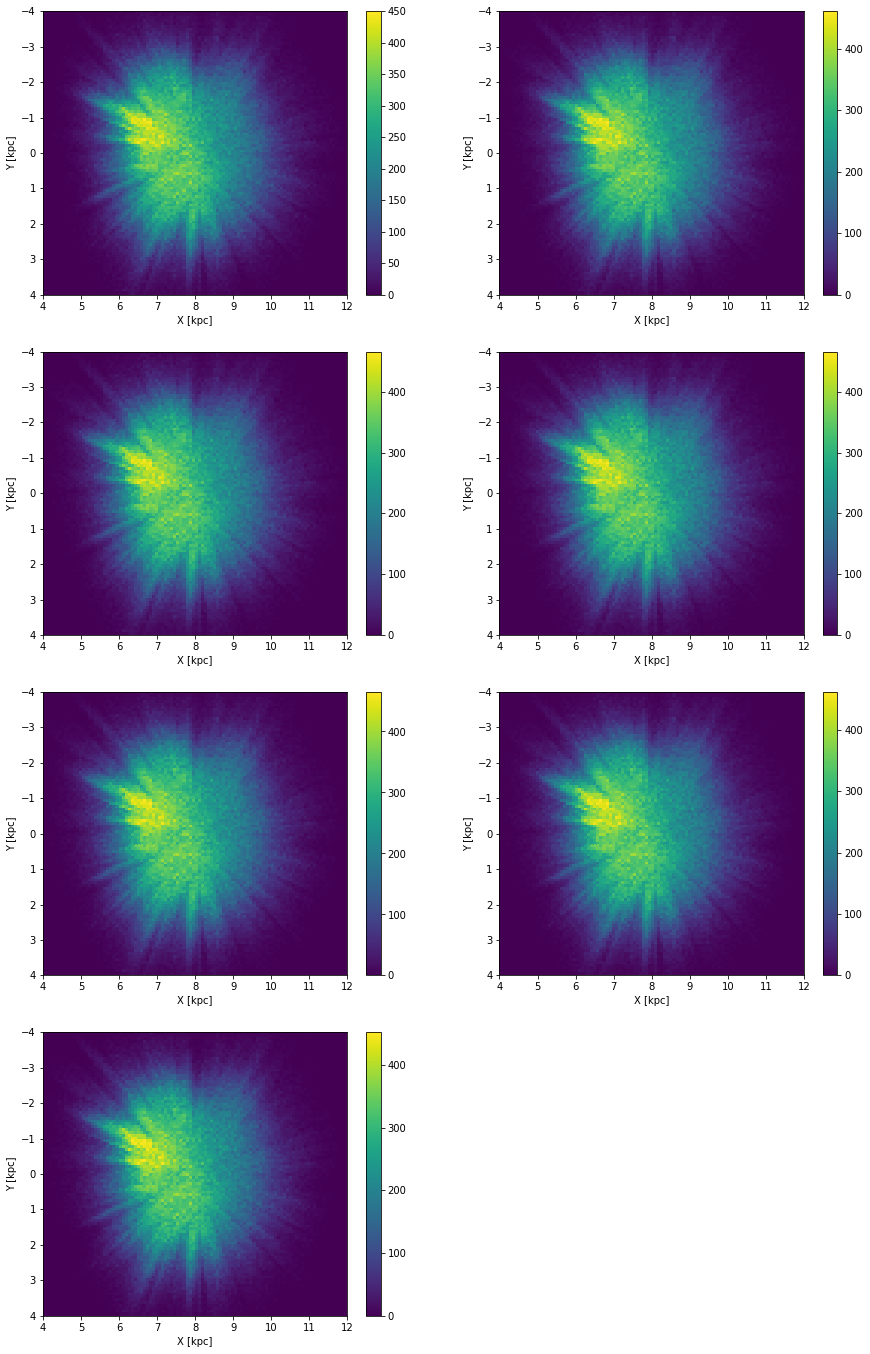

In [561]:
Mg = g - (5*np.log10(d.value*1000)-5)

plt.figure(figsize=(15,24))
for i in range(7):
    selected = ( \
            (d > 0) * (d.value<10) * (np.abs(bp_rp-0.75)<10.25) * (np.abs(Z.value+0.03+(i-3)*0.2)<1.2) * (np.abs(X.value-5)<122.5)* \
            ((U.value**2+(V.value+240)**2+(W.value+8)**2)<340**2)  * (pm_abs.value>0.05) * (np.abs(W.value+8)<20) *\
            (np.abs(1.77*(bp_rp-1)-Mg)<0.5) )
    
    
    
    H, xedges, yedges = np.histogram2d(X[selected].value+8, Y[selected], bins=(100, 100),range=((4,12),(-4,4)))
    H = H.T
    X_display, Y_display = np.meshgrid(xedges, yedges)
    
    plt.subplot(4,2,i+1)
    plt.pcolormesh(X_display, Y_display, H)
    plt.ylim(4,-4)
    plt.xlabel('X [kpc]')
    plt.ylabel('Y [kpc]')
    plt.colorbar()
plt.show()

/home/scheng/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in less
  if sys.path[0] == '':

/home/scheng/miniconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)

/home/scheng/miniconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)

/home/scheng/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in log10



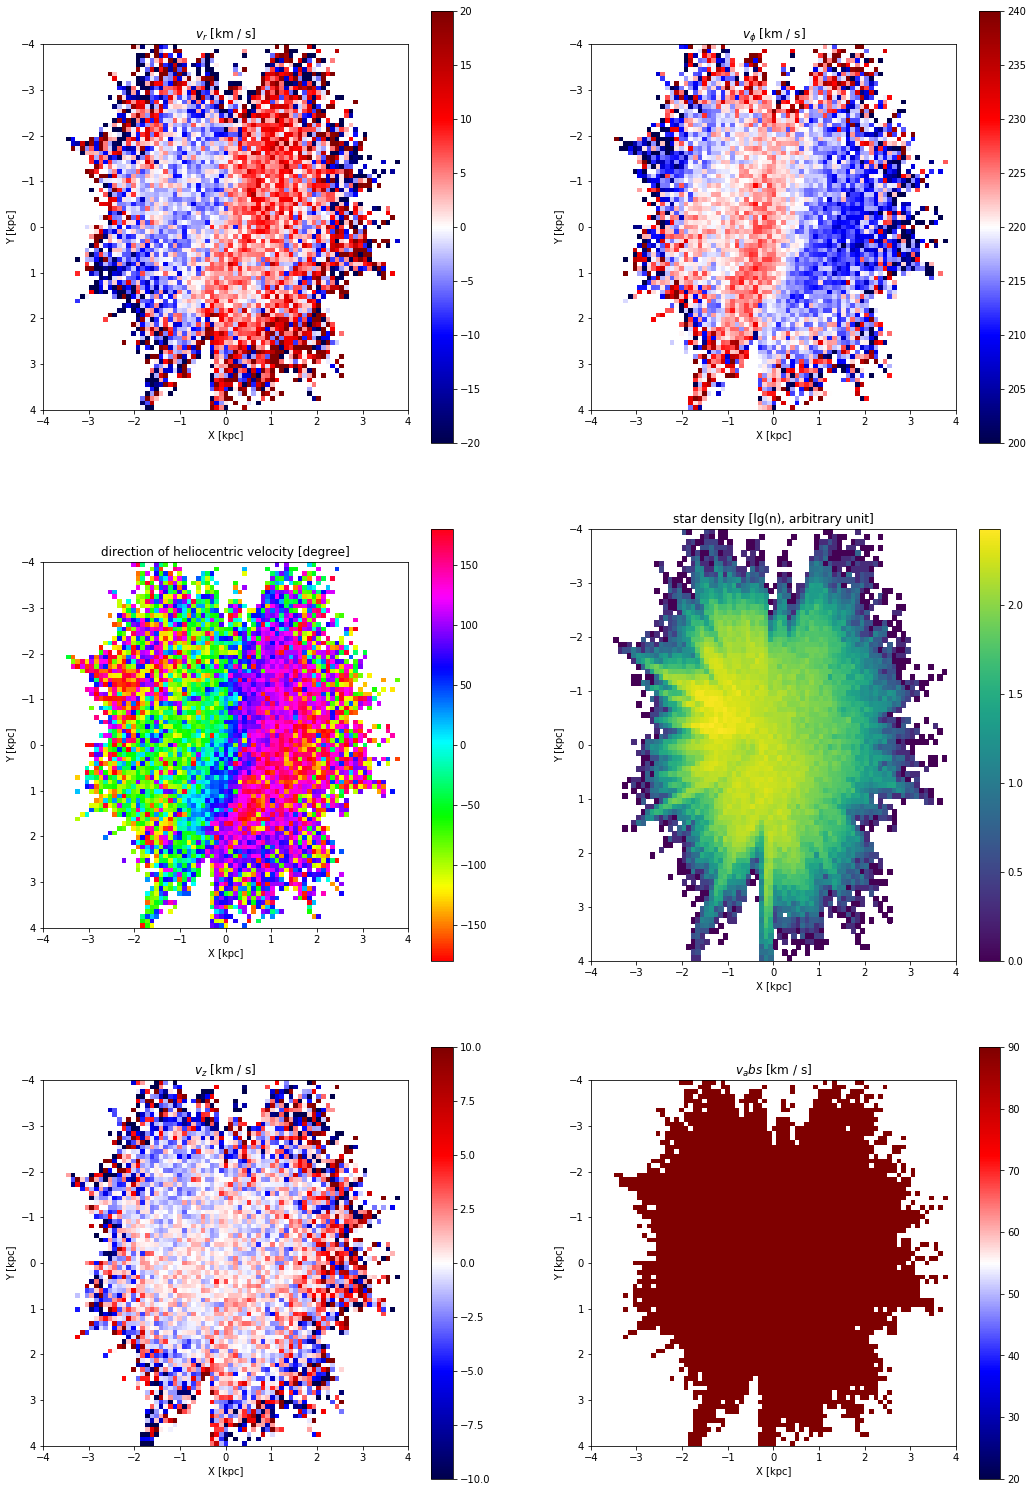

In [522]:
def plot_median(data_x, data_y, data_z, x1 = -4, x2 = 4, y1 = -4, y2 = 4, n = 80):    
    X_range = np.linspace(x1,x2,n)*u.kpc
    Y_range = np.linspace(y1,y2,n)*u.kpc
    average_array = np.empty((len(X_range)-1,len(Y_range)-1))
    for i,x_coor in enumerate(X_range[:-1]):
        for j,y_coor in enumerate(Y_range[:-1]):
            average_array[i,j] = (np.median(data_z[(data_x>X_range[i])*(data_x<X_range[i+1])*\
                                               (data_y>Y_range[j])*(data_y<Y_range[j+1])]))       
    return average_array



selected = ( \
            (d > 0) * (d.value<10) * (np.abs(bp_rp-0.75)<10.25) * (np.abs(Z.value+0.03)<0.1) * (np.abs(X.value-5)<122.5)* \
            ((U.value**2+(V.value+240)**2+(W.value+8)**2)<340**2)  * (pm_abs.value>0.05) * (np.abs(W.value+8)<20) *\
            (np.abs(1.77*(bp_rp-1)-Mg)<0.5) )



data_x = X[selected]
data_y = Y[selected]

theta = np.arctan2(Y.value,X.value+8.2)
vr = ((U.value+13)*np.cos(theta)-(V.value+240)*np.sin(theta))[selected]
vphi = ((V.value+240)*np.cos(theta)+(U.value+13)*np.sin(theta))[selected]


x1 = -4; x2 = 4; y1 = 4; y2 = -4; n = 80
plt.figure(figsize=(18,27)) 

plt.subplot(3,2,3)
plt.title('direction of heliocentric velocity [degree]')
vdirection_field = 180/np.pi*np.arctan2(plot_median(data_x, data_y, vr).T , plot_median(data_x, data_y, vphi-220).T )
plt.imshow(vdirection_field,\
           extent=[x1,x2,y1,y2],cmap='hsv')
plt.xlabel('X [kpc]')
plt.ylabel('Y [kpc]')
plt.colorbar()

plt.subplot(3,2,4)
plt.title('star density [lg(n), arbitrary unit]')
H, xedges, yedges = np.histogram2d(X[selected], Y[selected], bins=(n, n),range=((x1,x2),(min(y1,y2),max(y1,y2))))
H = H.T
X_display, Y_display = np.meshgrid(xedges, yedges)
plt.pcolormesh(X_display, Y_display, np.log10(H))
plt.xlabel('X [kpc]')
plt.ylabel('Y [kpc]')
plt.xlim(x1,x2)
plt.ylim(y1,y2)
plt.colorbar()

plt.subplot(3,2,1)
plt.title('$v_r$ [km / s]')
vr_field = plot_median(data_x, data_y, vr).T
plt.imshow(vr_field,\
           extent=[x1,x2,y1,y2],vmin=-20,vmax=20,cmap='seismic')
plt.xlabel('X [kpc]')
plt.ylabel('Y [kpc]')
plt.colorbar()

plt.subplot(3,2,2)
plt.title('$v_\phi$ [km / s]')
vphi_field = plot_median(data_x, data_y, vphi).T
plt.imshow(vphi_field,\
           extent=[x1,x2,y1,y2],vmin=200,vmax=240,cmap='seismic')
plt.xlabel('X [kpc]')
plt.ylabel('Y [kpc]')
plt.colorbar()

plt.subplot(3,2,5)
plt.title('$v_z$ [km / s]')
vphi_field = plot_median(data_x, data_y, W.value[selected]+8).T
plt.imshow(vphi_field,\
           extent=[x1,x2,y1,y2],vmin=-10,vmax=10,cmap='seismic')
plt.xlabel('X [kpc]')
plt.ylabel('Y [kpc]')
plt.colorbar()


plt.subplot(3,2,6)
plt.title('$v_abs$ [km / s]')
v_abs_field = ((vphi_field)**2 + vr_field**2)**0.5
plt.imshow(v_abs_field,\
           extent=[x1,x2,y1,y2],vmin=20,vmax=90,cmap='seismic')
plt.xlabel('X [kpc]')
plt.ylabel('Y [kpc]')
plt.colorbar()


plt.show()

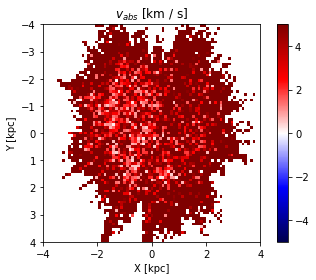

In [536]:
#plt.subplot(3,2,6)
plt.title('$v_{abs}$ [km / s]')
v_abs_field = ((vphi_field)**2 + vr_field**2)**0.5
plt.imshow(v_abs_field,\
           extent=[x1,x2,y1,y2],vmin=-5,vmax=5,cmap='seismic')
plt.xlabel('X [kpc]')
plt.ylabel('Y [kpc]')
plt.colorbar()
plt.show()

/home/scheng/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less
  

/home/scheng/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log10
  """

/home/scheng/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log10
  if sys.path[0] == '':



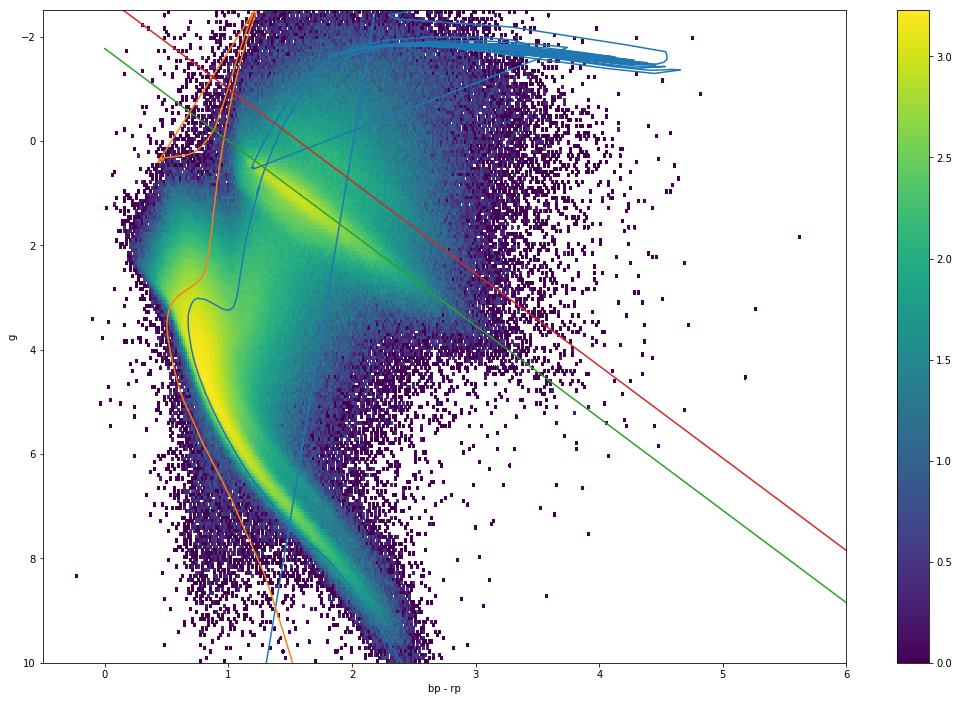

In [521]:
#plt.figure(figsize=(6,6))
selected = (\
                  (d > 0) * (d.value<10) * (np.abs(bp_rp-0.75)<10.25) * (np.abs(Z.value+0.03)<0.2) * (np.abs(X.value-5)<122.5)* \
                    ((U.value**2+(V.value+240)**2+(W.value+8)**2)<340**2) * (pm_abs.value>0.05) * (np.abs(W.value+8)<20) \
                     )

x = bp_rp
y = g - (5*np.log10(d.value*1000)-5) #- table['a_g_val']


plt.figure(figsize=(18,12))
H, xedges, yedges = np.histogram2d(x[selected], y[selected], bins=(400, 200),range=((-0.5,6),(-2.5,10)))
H = H.T
X_display, Y_display = np.meshgrid(xedges, yedges)
plt.pcolormesh(X_display, Y_display, np.log10(H))

#plt.legend()
plt.colorbar()

#plt.title(key)
plt.ylim(10,-2.5)
plt.xlim(-0.5,6)
plt.xlabel('bp - rp')
plt.ylabel('g')

plt.plot((isochrone_sun['G_BPmag']-isochrone_sun['G_RPmag']), isochrone_sun['Gmag'],'-')
#plt.plot((isochrone_sun['G_BPmag']-isochrone_sun['G_RPmag']), isochrone_sun['Gmag']+5,'-')
plt.plot((isochrone_mpoor['G_BP']-isochrone_mpoor['G_RP']), isochrone_mpoor['G'],'-')

x_line = np.array([0,6])
line = lambda x: 1.77*(x-1)+0
plt.plot(x_line, line(x_line))
plt.plot(x_line, line(x_line)-1)

plt.show()

In [ ]:
selected = (d.value<5)*(d > 0) * (e_d/d < 0.1) * (np.abs(bp_rp-0.75)<20) * (np.abs(Z.value-0)>0.0)\
            *(rv.value>-100000) * (pm_abs.value>-100000000)\
            *~((np.abs(galactic.velocity.d_z.value+7)<50) * (np.abs(galactic.velocity.d_x.value-10)<50) * (np.abs(galactic.velocity.d_y.value+15)<50))\
            * (sfd_ext<0.1)\
            * (np.abs(galactic.velocity.d_y.value+200)<50)
            
selected = (d.value<5)*(d > 0)* (e_d/d < 0.1) * (np.abs(bp_rp-0.75)<20)

x = (bp_rp-bayestar_ext/1.24)[selected]
y = (g - bayestar_ext*2.1 - (5*np.log10(d.value*1000)-5))[selected]
H, xedges, yedges = np.histogram2d(x,y, bins=(500, 500),range=((0,3),(-10,10)))
H = H.T
X_display, Y_display = np.meshgrid(xedges, yedges)

plt.figure(figsize=(12,12))
plt.pcolormesh(X_display, Y_display, (H))
#plt.colorbar()
#plt.contour(H, extent=(-100,100,-100,100))
plt.xlabel('BP-RP')
plt.ylabel(r'$M_G$')
plt.ylim(10,-5)
plt.xlim(0,3)
plt.colorbar()

#plt.plot((isochrone_sun['G_BPmag']-isochrone_sun['G_RPmag']), isochrone_sun['Gmag'],'.')
plt.plot((isochrone_old['G_BPmag']-isochrone_old['G_RPmag']), isochrone_old['Gmag'],'.')
plt.plot((isochrone_mpoor['G_BP']-isochrone_mpoor['G_RP']), isochrone_mpoor['G'],'.')


plt.show()
#plt.imshow(H)
print(selected.sum())